#Importing the data from kaggle


In [1]:
import json

jason = {"username":"ethanjolly","key":"31d85015eed2df99e20a63d604017440"}
with open('kaggle.json','w') as outfile:
  json.dump(jason, outfile)

!pip install kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle.json
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs
!unzip cuhk-face-sketch-database-cufs.zip

Streaming output truncated to the last 5000 lines.
  inflating: cropped_sketch/00726.jpg  
  inflating: cropped_sketch/00727.jpg  
  inflating: cropped_sketch/00728.jpg  
  inflating: cropped_sketch/00729.jpg  
  inflating: cropped_sketch/00730.jpg  
  inflating: cropped_sketch/00731.jpg  
  inflating: cropped_sketch/00732.jpg  
  inflating: cropped_sketch/00733.jpg  
  inflating: cropped_sketch/00734.jpg  
  inflating: cropped_sketch/00735.jpg  
  inflating: cropped_sketch/00736.jpg  
  inflating: cropped_sketch/00737.jpg  
  inflating: cropped_sketch/00738.jpg  
  inflating: cropped_sketch/00739.jpg  
  inflating: cropped_sketch/00740.jpg  
  inflating: cropped_sketch/00741.jpg  
  inflating: cropped_sketch/00742.jpg  
  inflating: cropped_sketch/00743.jpg  
  inflating: cropped_sketch/00744.jpg  
  inflating: cropped_sketch/00745.jpg  
  inflating: cropped_sketch/00746.jpg  
  inflating: cropped_sketch/00747.jpg  
  inflating: cropped_sketch/00749.jpg  
  inflating: cropped_sketch/0

# Coursework 1

## Reading in the data

['f1-001-01-sz1.jpg', 'f1-002-01-sz1.jpg', 'f1-003-01-sz1.jpg', 'f1-004-01-sz1.jpg', 'f1-005-01-sz1.jpg', 'f1-006-01-sz1.jpg', 'f1-007-01-sz1.jpg', 'f1-008-01-sz1.jpg', 'f1-009-01-sz1.jpg', 'f1-010-01-sz1.jpg', 'f1-011-01-sz1.jpg', 'f1-012-01-sz1.jpg', 'f1-013-01-sz1.jpg', 'f1-014-01-sz1.jpg', 'f1-015-01-sz1.jpg', 'F2-005-01-sz1.jpg', 'F2-006-01-sz1.jpg', 'F2-007-01-sz1.jpg', 'F2-008-01-sz1.jpg', 'F2-009-01-sz1.jpg', 'F2-010-01-sz1.jpg', 'F2-011-01-sz1.jpg', 'F2-012-01-sz1.jpg', 'F2-013-01-sz1.jpg', 'F2-014-01-sz1.jpg', 'F2-015-01-sz1.jpg', 'F2-016-01-sz1.jpg', 'F2-017-01-sz1.jpg', 'F2-018-01-sz1.jpg', 'F2-019-01-sz1.jpg', 'F2-020-01-sz1.jpg', 'F2-021-01-sz1.jpg', 'F2-022-01-sz1.jpg', 'F2-023-01-sz1.jpg', 'F2-024-01-sz1.jpg', 'F2-025-01-sz1.jpg', 'F2-026-01-sz1.jpg', 'F2-027-01-sz1.jpg', 'F2-028-01-sz1.jpg', 'F2-029-01-sz1.jpg', 'F2-030-01-sz1.jpg', 'F2-031-01-sz1.jpg', 'F2-032-01-sz1.jpg', 'F2-033-01-sz1.jpg', 'F2-034-01-sz1.jpg', 'F2-035-01-sz1.jpg', 'F2-036-01-sz1.jpg', 'F2-037-01-s

188it [00:00, 194.49it/s]


940
[137, 582, 867, 821, 782, 64, 261, 120, 507, 779]


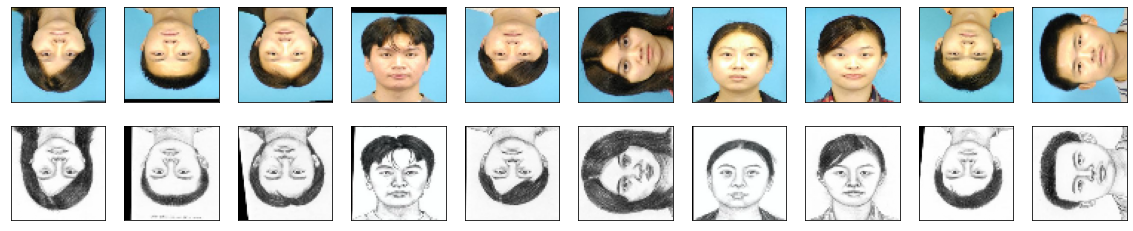

In [2]:
from locale import MON_1
import numpy as np
import os
import cv2 as cv
from tqdm import tqdm
import random
import itertools
import pandas as pd
import matplotlib.pyplot as plt


# foldernames = os.listdir('drive/MyDrive/faceSketchImages')
faces, sketches = [], []

# facesfiles = os.listdir('drive/MyDrive/faceSketchImages/photos')
facesfiles = os.listdir('photos')

f1, f, m, m1 = [], [], [], []
for fil in facesfiles:
  if fil[:2] == 'f1':
    f1.append(fil)
  elif fil[:2] == 'f-':
    f.append(fil)
  elif fil[:2] == 'm1':
    m1.append(fil) 
  elif fil[:2] == 'm-':
    m.append(fil)

facesfiles = list(itertools.chain(sorted(f1), sorted(f), sorted(m1), sorted(m)))

# sketchesfiles = os.listdir('drive/MyDrive/faceSketchImages/sketches')
sketchesfiles = os.listdir('sketches')

f1sk, F2, fsk, m1sk, M2, msk = [], [], [], [], [], []
for fil in sketchesfiles:
  if fil[:2] == 'f1':
    f1sk.append(fil)
  elif fil[:2] == 'F2':
    F2.append(fil)
  elif fil[:2] == 'f-':
    fsk.append(fil) 
  elif fil[:2] == 'm1':
    m1sk.append(fil)
  elif fil[:2] == 'M2':
    M2.append(fil)
  elif fil[:2] == 'm-':
    msk.append(fil)

sketchesfiles = list(itertools.chain(sorted(f1sk), sorted(F2), sorted(fsk), sorted(m1sk), sorted(M2), sorted(msk)))
print(sketchesfiles)

for face, sketch in tqdm(zip(facesfiles, sketchesfiles)):
  # imface = cv.imread('drive/MyDrive/faceSketchImages/photos/{}'.format(face))
  imface = cv.imread('photos/{}'.format(face))
  imface = cv.cvtColor(imface, cv.COLOR_BGR2RGB)
  imface = cv.resize(imface, (64, 64))
  imface = imface.astype('float32') / 255.0
  faces.append(imface)

  faces.append(cv.flip(imface, 1))
  faces.append(cv.flip(imface, -1))

  faces.append(cv.rotate(imface, cv.ROTATE_90_CLOCKWISE))
  faces.append(cv.rotate(imface, cv.ROTATE_90_COUNTERCLOCKWISE))

  # skface = cv.imread('drive/MyDrive/faceSketchImages/sketches/{}'.format(sketch))
  skface = cv.imread('sketches/{}'.format(sketch))
  skface = cv.resize(skface, (64, 64))
  skface = skface.astype('float32') / 255.0
  sketches.append(skface)

  sketches.append(cv.flip(skface, 1))
  sketches.append(cv.flip(skface, -1))

  sketches.append(cv.rotate(skface, cv.ROTATE_90_CLOCKWISE))
  sketches.append(cv.rotate(skface, cv.ROTATE_90_COUNTERCLOCKWISE))


print(len(sketches))
random.seed(1)
randomImages = random.sample(range(0, len(sketches)), 10)
print(randomImages)
n = 10  # How many to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display face
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(faces[randomImages[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display sketch
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sketches[randomImages[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

data = list(zip(faces, sketches))

## Splitting in to training and test data

(940, 64, 64, 3)
(940, 64, 64, 3)
940
(752, 64, 64, 3)
(188, 64, 64, 3)


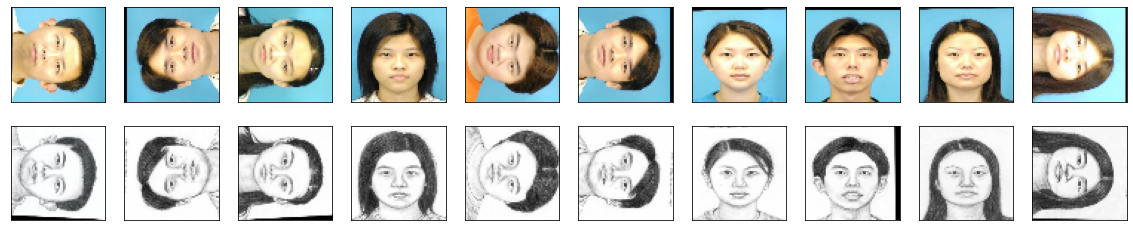

In [3]:
random.Random(1).shuffle(data)
faces, sketches = zip(*data)
faces = np.array(faces)
sketches = np.array(sketches)

print(faces.shape)
print(sketches.shape)

n = faces.shape[0]
print(n)

trainTestSplit = 0.8
faceTrain = faces[:752, :, :, :]
faceTest = faces[752:, :, :, :]
sketchTrain = sketches[:752, :, :, :]
sketchTest = sketches[752:, :, :, :]

print(faceTrain.shape)
print(faceTest.shape)

n = 10  # How many to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display face
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(faceTest[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display sketch
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sketchTest[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Defining all of our autoencoders


In [4]:
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from keras import layers

def DAE():
    INPUT_SHAPE = (64, 64, 3)

    encoder = keras.models.Sequential()
    encoder.add(keras.layers.InputLayer(INPUT_SHAPE))
    encoder.add(keras.layers.Flatten())
    encoder.add(keras.layers.Dense(256, activation='relu'))
    encoder.add(keras.layers.Dense(128, activation='relu'))
    encoder.add(keras.layers.Dense(64, activation='relu'))

    decoder = keras.models.Sequential()
    decoder.add(keras.layers.InputLayer((64,)))
    decoder.add(keras.layers.Dense(64, activation='relu'))
    decoder.add(keras.layers.Dense(128, activation='relu'))
    decoder.add(keras.layers.Dense(256, activation='relu'))
    decoder.add(keras.layers.Dense(np.prod(INPUT_SHAPE), activation='sigmoid'))
    decoder.add(keras.layers.Reshape(INPUT_SHAPE))

    input = keras.layers.Input(INPUT_SHAPE)
    encoded = encoder(input)
    decoded = decoder(encoded)

    dae = keras.models.Model(input, decoded)
    return dae

def sampling(args):
    z_mean, z_log_sigma, latent_dim = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

def convAE():
    input_img = keras.Input(shape=(64, 64, 3))

    x = layers.Conv2D(8, (5, 5), 1, padding = 'same', kernel_initializer = 'he_normal')(input_img)
    x = layers.LeakyReLU(name='lr13')(x)
    x = layers.Conv2D(16, (5, 5), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = layers.LeakyReLU(name='lr0')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Conv2D(32, (3, 3), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = layers.BatchNormalization(name='b1')(x)
    x = layers.LeakyReLU(name='lr1')(x)
    x = layers.Conv2D(64, (3, 3), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = layers.LeakyReLU(name='lr2')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Conv2D(128, (2, 2), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = layers.BatchNormalization(name='b3')(x)
    x = layers.LeakyReLU(name='lr3')(x)

    x = layers.Conv2DTranspose(128, (2, 2), 2, padding='same', kernel_initializer = 'he_normal')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.LeakyReLU(name='lr6')(x)
    x = layers.Conv2DTranspose(64, (2, 2), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = layers.LeakyReLU(name='lr7')(x)
    x = layers.Conv2DTranspose(32, (3, 3), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.LeakyReLU(name='lr8')(x)
    x = layers.Conv2DTranspose(16, (3, 3), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = layers.LeakyReLU(name='lr11')(x)
    x = layers.Conv2DTranspose(8, (5, 5), 1, padding = 'same')(x)
    x = layers.LeakyReLU(name='lr12')(x)

    decoded = layers.Conv2DTranspose(3, (5, 5), 1, activation='sigmoid', padding = 'same')(x)

    model = keras.Model(input_img, decoded)
    return model


def combine():
    face2sketch = convAE()
    sketch2face = convAE()

    face2sketch.compile(optimizer='adam', loss=ssim_loss, metrics=['mse', 'mae'])
    print(face2sketch.summary())
    face2sketchTrain = face2sketch.fit(faceTrain, sketchTrain,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(faceTest, sketchTest))
    
    sketchTrain2 = face2sketch.predict(faceTrain)
    sketchTest2 = face2sketch.predict(faceTest)
    
    sketch2face.compile(optimizer='adam', loss=ssim_loss, metrics=['mse', 'mae'])
    print(sketch2face.summary())
    sketch2faceTrain = sketch2face.fit(sketchTrain2, faceTrain,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(sketchTest, faceTest))
    
    for i in range(5):
        decode = sketch2face.predict(sketchTest)

        plt.subplot(1,3,1)
        plt.title("Original face")
        plt.imshow(faceTest[i])

        plt.subplot(1,3,2)
        plt.title("Original Sketch")
        plt.imshow(sketchTest[i])

        plt.subplot(1,3,3)
        plt.title("Reconstructed face")
        plt.imshow(decode[i])
        plt.show()

def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 3.0))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         104       
                                                                 
 lr13 (LeakyReLU)            (None, 64, 64, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        528       
                                                                 
 lr0 (LeakyReLU)             (None, 32, 32, 16)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        2080  

# Combined Network

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 8)         608       
                                                                 
 lr13 (LeakyReLU)            (None, 64, 64, 8)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        3216      
                                                                 
 lr0 (LeakyReLU)             (None, 32, 32, 16)        0         
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640

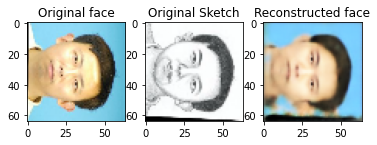

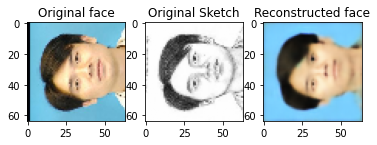

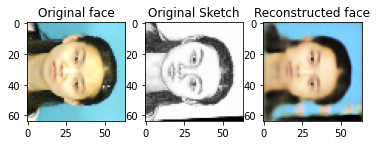

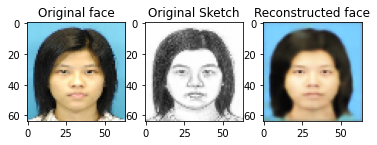

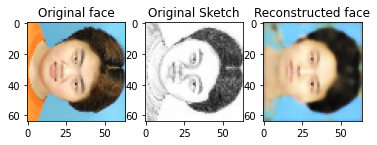

In [ ]:
comb = combine()

#Face2Sketch Tests

##DAE

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 64)                3187136   
                                                                 
 sequential_1 (Sequential)   (None, 64, 64, 3)         3203520   
                                                                 
Total params: 6,390,656
Trainable params: 6,390,656
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
24/24 [==============================] - 20s 795ms/step - loss: 0.5267 - mse: 0.1273 - mae: 0.3258 - val_loss: 0.4746 - val_mse: 0.0897 - val_mae: 0.2631
Epoch 2/100
24/24 [==============================] - 19s 776ms/step - loss: 0.4346 - mse: 0.0694 - mae: 0.2149 - val_loss: 0.3810 - val_mse: 0

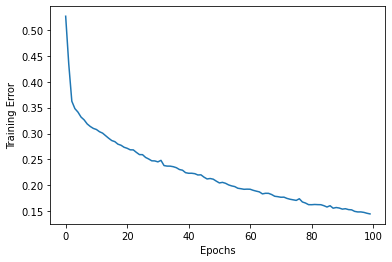

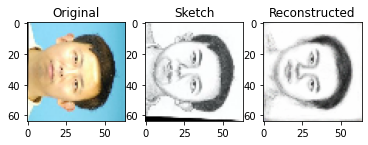

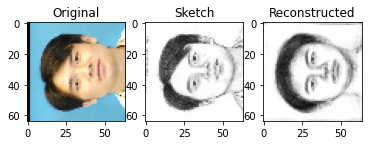

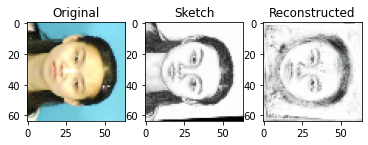

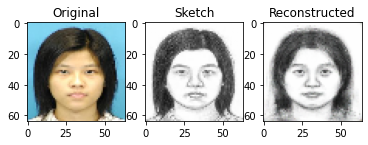

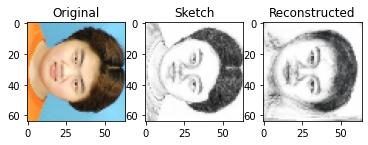

In [ ]:
dae = DAE()
dae.compile('adam', loss=ssim_loss, metrics=['mse', 'mae'])
print(dae.summary())
daeTrain = dae.fit(faceTrain, sketchTrain, epochs=100, batch_size=32,
                   shuffle=True,
                   validation_data=(faceTest, sketchTest))

plt.plot(daeTrain.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.show()

for i in range(5):
    decode = dae.predict(faceTest)

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(faceTest[i])

    plt.subplot(1,3,2)
    plt.title("Sketch")
    plt.imshow(sketchTest[i])

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(decode[i])
    plt.show()

##Convolutional AE

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 8)         608       
                                                                 
 lr13 (LeakyReLU)            (None, 64, 64, 8)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        3216      
                                                                 
 lr0 (LeakyReLU)             (None, 32, 32, 16)        0         
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 32)        4640

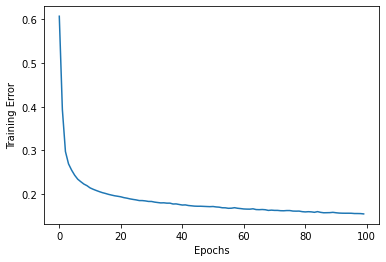

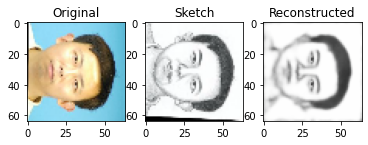

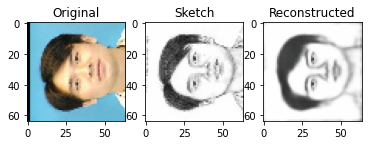

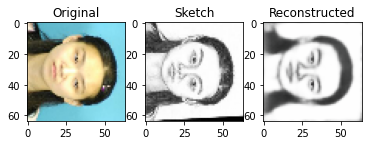

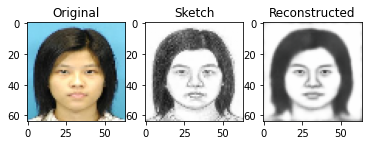

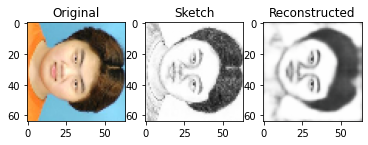

In [ ]:
convae = convAE()

convae.compile(optimizer='adam', loss=ssim_loss, metrics=['mse', 'mae'])
print(convae.summary())
convaeTrain = convae.fit(faceTrain, sketchTrain,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(faceTest, sketchTest))

plt.plot(convaeTrain.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.show()

for i in range(5):
    decode = convae.predict(faceTest)

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(faceTest[i])

    plt.subplot(1,3,2)
    plt.title("Sketch")
    plt.imshow(sketchTest[i])

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(decode[i])
    plt.show()

#Sketch2Face Tests
##DAE

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 64)                3187136   
                                                                 
 sequential_1 (Sequential)   (None, 64, 64, 3)         3203520   
                                                                 
Total params: 6,390,656
Trainable params: 6,390,656
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
24/24 [==============================] - 21s 801ms/step - loss: 0.4731 - mse: 0.0737 - mae: 0.2313 - val_loss: 0.4316 - val_mse: 0.0615 - val_mae: 0.2047
Epoch 2/100
24/24 [==============================] - 19s 786ms/step - loss: 0.4071 - mse: 0.0575 - mae: 0.1958 - val_loss: 0.3762 - val_mse: 0

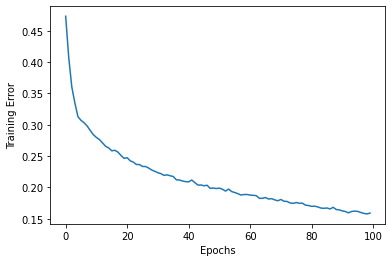

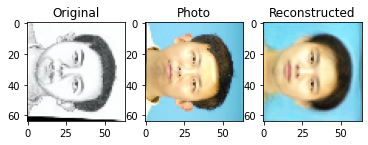

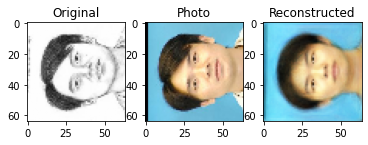

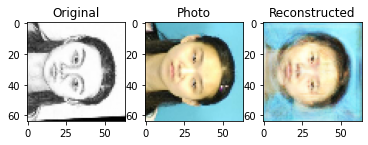

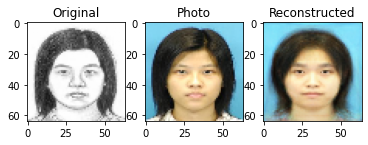

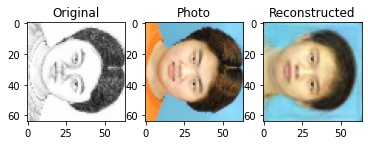

In [ ]:
dae = DAE()
dae.compile('adam', loss=ssim_loss, metrics=['mse','mae'])
print(dae.summary())
daeTrain = dae.fit(sketchTrain, faceTrain, epochs=100, batch_size=32,
                   shuffle=True,
                   validation_data=(sketchTest, faceTest))

plt.plot(daeTrain.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.show()

for i in range(5):
    decode = dae.predict(sketchTest)

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(sketchTest[i])

    plt.subplot(1,3,2)
    plt.title("Photo")
    plt.imshow(faceTest[i])

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(decode[i])
    plt.show()

##Convolutional AE

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 8)         608       
                                                                 
 lr13 (LeakyReLU)            (None, 64, 64, 8)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        3216      
                                                                 
 lr0 (LeakyReLU)             (None, 32, 32, 16)        0         
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640

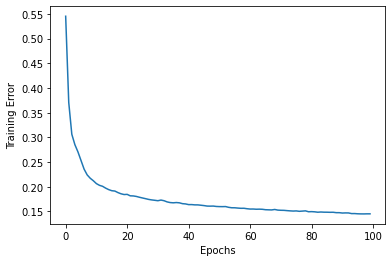

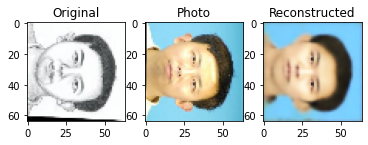

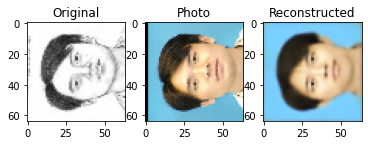

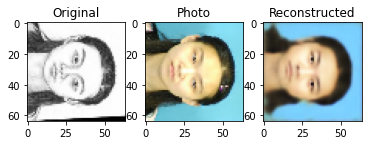

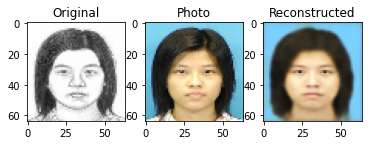

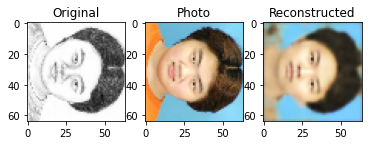

In [ ]:
convae = convAE()

convae.compile(optimizer='adam', loss=ssim_loss, metrics=['mse', 'mae'])
print(convae.summary())
convaeTrain = convae.fit(sketchTrain, faceTrain,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(sketchTest, faceTest))

plt.plot(convaeTrain.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.show()

for i in range(5):
    decode = convae.predict(sketchTest)

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(sketchTest[i])

    plt.subplot(1,3,2)
    plt.title("Photo")
    plt.imshow(faceTest[i])

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(decode[i])
    plt.show()